In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Initialize arrays for angles (x1 and x2) and outputs (y)
x1 = np.zeros(101)  # Angle of the first joint
x2 = np.zeros(101)  # Angle of the second joint
y = np.zeros(100)   # Output (end effector position, or angle of interest)

# Initial conditions
x1[0] = 0  # Initial angle for the first joint
x2[0] = 0  # Initial angle for the second joint

# Parameters for the open-loop control system
L1 = 1.0  # Length of the first link
L2 = 1.0  # Length of the second link
dt = 0.1  # Time step

for k in range(100):
    # Open-loop system dynamics
    # Assume the control input is predefined and not dependent on the current state
    u1 = 1.0  # Predefined control input for joint 1
    u2 = 0.5  # Predefined control input for joint 2

    # Update the angular positions based on the control input and some dynamics
    x1[k+1] = x1[k] + x2[k] * dt + u1 * dt  # Position update for joint 1
    x2[k+1] = x2[k] + u2 * dt - 0.1 * x2[k]  # Position update for joint 2 with damping

    # Calculate the end effector position (y) based on the joint angles
    y[k] = L1 * np.cos(x1[k]) + L2 * np.cos(x1[k] + x2[k])


A = np.array([[0, 1], [0.3, 0]])
H = np.array([[-1.4, 0], [0, 0]])  
C = np.array([1, 0])  
rho = y  
Ws = np.zeros((100, 2, 2))
C = C.reshape(1, 2)
X_hat = np.zeros((101, 2, 1))
x1_hat = np.zeros(101)
y_hat = np.zeros(100)
x2_hat = np.zeros(101)
g2 = np.array([1, 0])
g2 = g2.reshape(2, 1)
L_updated = np.array([0.32, 0.3335])
L_updated = L_updated.reshape(2, 1)

for k in range(100):
    Ws[k] = A + rho[k] * H - L_updated @ C
    X_hat[k+1] = Ws[k]@X_hat[k] + L_updated*y[k] + g2
    x1_hat[k] = X_hat[k][0]
    x2_hat[k] = X_hat[k][1]
    y_hat[k] = x1_hat[k]


mse = mean_squared_error(y, y_hat)


print(mse)



2.612282486291461e+28


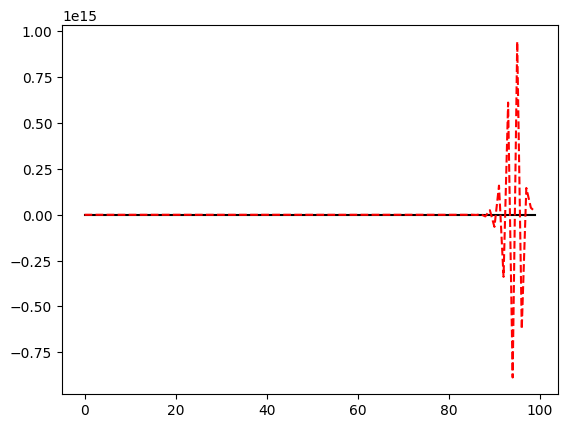

In [4]:
plt.plot(y, 'k', label='y')
plt.plot(y_hat, 'r--', label='y_hat')